In [1]:
%matplotlib inline
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from root_numpy import root2array

In [2]:
filedir = '/Users/davidkaleko/larlite/UserDev/KalekoAna/CCInclusive/mac'

In [37]:
myfile1 = filedir + '/XiaoEventAna_out_BNBcosmic.root'
#myfile2 = filedir + '/XiaoEventAna_out_FILTERFLIP.root'
myfile2 = filedir + '/XiaoEventAna_out_filterflip1_radius3.00.root'
dflist = [ pd.DataFrame( root2array( myfile1, 'tree' ) ), 
          pd.DataFrame( root2array( myfile2, 'tree' ) ) ]
          
          
df =pd.concat(dflist, #list of data frames
                    axis=1,     #axis to join on (0==row, 1==column)
                    keys=['FilterTrue','FilterFlip'])

In [38]:
df.FilterTrue.columns.values

array(['true_nu_pdg', 'true_nu_E', 'true_nu_CCNC', 'true_nu_mode',
       'mu_contained', 'p_phi', 'mu_phi', 'correct_ID', 'mu_end_dedx',
       'mu_start_dedx', 'fndecay', 'mu_p_dirdot', 'true_lepton_pdg',
       'true_lepton_momentum', 'n_associated_tracks', 'longest_trk_len',
       'second_longest_trk_len', 'longest_trk_theta',
       'longest_trk_MCS_mom', 'nu_E_estimate', 'true_nu_x', 'true_nu_y',
       'true_nu_z', 'dist_reco_true_vtx', 'max_tracks_dotprod',
       'longest_tracks_dotprod', 'longest_tracks_dotprod_trkendpoints'], dtype=object)

In [14]:
cutquery = 'nu_E_estimate > 3'
#cutquery = 'n_associated_tracks > -999999'
cutdfFilterTrue = df.FilterTrue.query(cutquery)
cutdfFilterFlip = df.FilterFlip.query(cutquery)

In [15]:
print len(cutdfFilterTrue)
print len(cutdfFilterFlip)

90
20


# Filter selected events with reco E > 3: 90
# Filter FLIP selected events with reco E > 3: 20
# Filter selected events with reco E > 3: 90
# Filter FLIP selected events with reco E > 3: 20


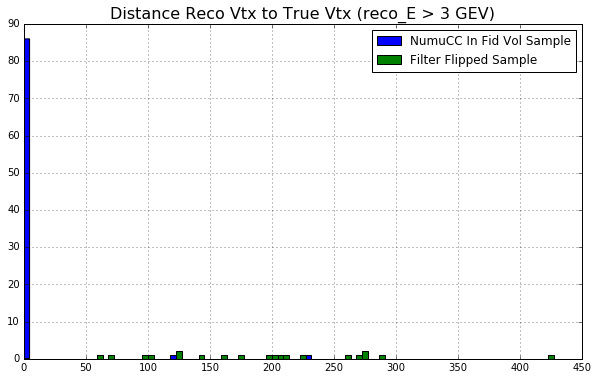

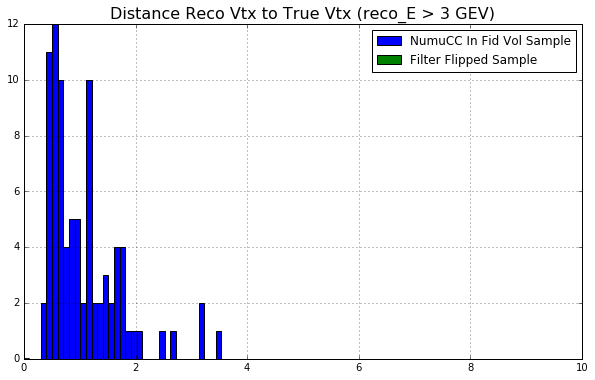

In [16]:
def plotDistRecoTrueVtx(mybins):
    myx = cutdfFilterTrue['dist_reco_true_vtx'].values
    plt.figure(figsize=(10,6))
    plt.grid(True,'both')
    fart = plt.hist(myx,bins=mybins,label='NumuCC In Fid Vol Sample')
    plt.title("Distance Reco Vtx to True Vtx (reco_E > 3 GEV)",fontsize=16)

    myx = cutdfFilterFlip['dist_reco_true_vtx'].values
    plt.grid(True,'both')
    fart = plt.hist(myx,bins=mybins,label='Filter Flipped Sample')

    plt.legend(loc='best')

    print "# Filter selected events with reco E > 3:",len(cutdfFilterTrue)
    print "# Filter FLIP selected events with reco E > 3:",len(cutdfFilterFlip)

binsbins = np.linspace(0,450,100)
plotDistRecoTrueVtx(binsbins)
binsbins = np.linspace(0,10,100)
plotDistRecoTrueVtx(binsbins)

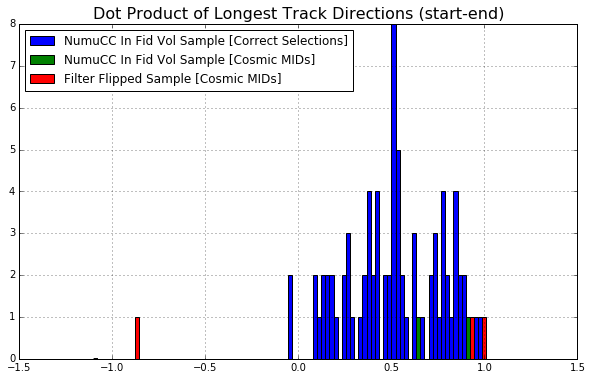

In [24]:
def plotDotProds(mybins):
    myx = cutdfFilterTrue.query('second_longest_trk_len > 16. and correct_ID == 1')['longest_tracks_dotprod_trkendpoints'].values
    plt.figure(figsize=(10,6))
    plt.grid(True,'both')
    fart = plt.hist(myx,bins=mybins,label='NumuCC In Fid Vol Sample [Correct Selections]')
    plt.title("Dot Product of Longest Track Directions (start-end)",fontsize=16)

    myx = cutdfFilterTrue.query('second_longest_trk_len > 16. and correct_ID != 1')['longest_tracks_dotprod_trkendpoints'].values
   
    plt.grid(True,'both')
    fart = plt.hist(myx,bins=mybins,label='NumuCC In Fid Vol Sample [Cosmic MIDs]')
     
    myx = cutdfFilterFlip.query('second_longest_trk_len > 16. and correct_ID != 1')['longest_tracks_dotprod_trkendpoints'].values
    plt.grid(True,'both')
    fart = plt.hist(myx,bins=mybins,label='Filter Flipped Sample [Cosmic MIDs]')
     
    plt.legend(loc='best')
plotDotProds(np.linspace(-1.1,1.1,100))

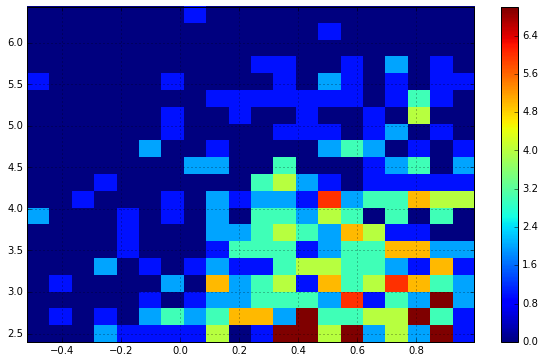

In [23]:
myx = df.FilterTrue.query('correct_ID == 1 and true_nu_E > 2.4')['longest_tracks_dotprod_trkendpoints'].values
myy = df.FilterTrue.query('correct_ID == 1 and true_nu_E > 2.4')['true_nu_E'].values
plt.figure(figsize=(10,6))
plt.grid(True,'both')
fart = plt.hist2d(myx,myy,bins=20)
plt.colorbar()


myx = df.FilterFlip.query('correct_ID != 1')['longest_tracks_dotprod_trkendpoints'].values
myy = df.FilterFlip.query('correct_ID != 1')['true_nu_E'].values
plt.figure(figsize=(10,6))
plt.grid(True,'both')
fart = plt.hist2d(myx,myy,bins=20)
plt.colorbar()

In [ ]:

def plotSecondLongestTrkLen(mybins):
    myx = cutdfFilterTrue.query('dist_reco_true_vtx < 5')['second_longest_trk_len'].values
    plt.figure(figsize=(10,6))
    plt.grid(True,'both')
    fart = plt.hist(myx,bins=mybins,label='NumuCC In Fid Vol Sample [Correct ID only]',alpha=0.75)
    plt.title("Length of Second Longest Associated Track (reco_E > 3 GEV)",fontsize=16)
    plt.xlabel('Track Length [cm]',fontsize=16)
    plt.ylabel('Events in 2e20 POT',fontsize=16)
    myx = cutdfFilterFlip.query('dist_reco_true_vtx > 5')['second_longest_trk_len'].values
    plt.grid(True,'both')
    fart = plt.hist(myx,bins=mybins,label='Filter Flipped Sample [Cosmic MID only]',alpha=0.75)

    plt.legend(loc='best')

binsbins = np.linspace(0,250,100)
plotSecondLongestTrkLen(binsbins)
binsbins = np.linspace(0,25,100)
plotSecondLongestTrkLen(binsbins)

In [ ]:
myquery = 'nu_E_estimate > 3. and  dist_reco_true_vtx > 5. and second_longest_trk_len > 16.'
print len(df.FilterFlip.query(myquery))
print len(df.FilterTrue.query(myquery))
myquery = 'nu_E_estimate > 3. and  dist_reco_true_vtx < 5. and fndecay > 10 and second_longest_trk_len > 16.'
print len(df.FilterFlip.query(myquery))
print len(df.FilterTrue.query(myquery))

In [ ]:
df.FilterFlip.query('nu_E_estimate>3').hist('dist_reco_true_vtx',bins=np.linspace(0,250,100))

In [ ]:
def plotMaxTracksDotProd(mybins):
    myx = cutdfFilterTrue.query('dist_reco_true_vtx < 5 and second_longest_trk_len > 16.')['max_tracks_dotprod'].values
    plt.figure(figsize=(10,6))
    plt.grid(True,'both')
    fart = plt.hist(myx,bins=mybins,label='NumuCC In Fid Vol Sample [Correct ID only]',alpha=0.75)
    plt.title("Max abs(Dot Prod) Associated Track Directions (reco_E > 3 GEV, 2nd Track Len > 16)",
              fontsize=14)
    plt.xlabel('Abs(Dot Product of Track Directions)',fontsize=16)
    plt.ylabel('Events in 2e20 POT',fontsize=16)
    myx = cutdfFilterFlip.query('dist_reco_true_vtx > 5 and second_longest_trk_len > 16.')['max_tracks_dotprod'].values
    plt.grid(True,'both')
    fart = plt.hist(myx,bins=mybins,label='Filter Flipped Sample [Cosmic MID only]')

    plt.legend(loc='best')

binsbins = np.linspace(-.1,1.1,100)
plotMaxTracksDotProd(binsbins)
binsbins = np.linspace(0.99,1.01,100)
plotMaxTracksDotProd(binsbins)

In [28]:
blah= np.array([1,2,3,4])
print blah.astype(float)

[ 1.  2.  3.  4.]


In [35]:
def nExpectedEvents():
    basequery = 'nu_E_estimate > 3. and second_longest_trk_len > 16.'
    n_correct = len(df.FilterTrue.query(basequery).query('correct_ID == 1 and fndecay < 10'))
    n_pionMID = len(df.FilterTrue.query(basequery).query('correct_ID == 1 and fndecay >= 10'))
    n_cosmMID = len(df.FilterTrue.query(basequery).query('correct_ID == 0'))
    n_cosmMID += len(df.FilterFlip.query(basequery).query('correct_ID == 0'))
    n_correct *= (3./2)
    n_pionMID *= (3./2)
    n_cosmMID *= 5. * (3./2)
    
    return (n_correct, n_pionMID, n_cosmMID)

In [39]:
print nExpectedEvents()

(108.0, 10.5, 37.5)
